In [1]:
import gym

env = gym.make('FrozenLake-v0')

print(env.observation_space.n)
print(env.action_space.n)

env.reset()

16
4


0

In [3]:
action = env.action_space.sample()
observation, reward, done, info = env.step(action)
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [4]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n
Q = np.zeros((STATES, ACTIONS))

In [5]:
EPISODES = 10000
MAX_STEPS = 100

LEARNING_RATE = 0.01
GAMMA = 0.96

In [7]:
# Picking an action
eps = 0.9

if np.random.uniform(0, 1)<eps:
    action = env.action_space.sample()
else:
    action = np.argmax(Q[state, :])

In [8]:
# Update Q Values
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA*np.max(Q[new_state, :]) - Q[state, action])

NameError: name 'state' is not defined

In [9]:
# Example

import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n
Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500
MAX_STEPS = 100

LEARNING_RATE = 0.8
GAMMA = 0.96

eps = 0.9

RENDER = False

rewards = []
for episode in range(EPISODES):
    state = env.reset()
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        if np.random.uniform(0, 1)<eps:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA*np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done:
            rewards.append(reward)
            eps -= 0.001
            break

In [10]:
print(Q)
print(sum(rewards)/len(rewards))

[[2.56781699e-01 5.81942046e-03 6.77405540e-03 7.49562636e-03]
 [1.99896768e-03 2.25305086e-03 9.51007223e-04 2.35666351e-01]
 [1.25480769e-03 1.51659128e-03 2.44565707e-03 2.20830905e-01]
 [2.73933517e-03 7.81791001e-04 2.19317565e-03 9.98970586e-02]
 [2.47375737e-01 6.71229624e-03 3.97296744e-03 8.39314166e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.33335117e-02 1.56376679e-04 3.60259883e-04 1.29591762e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.65095390e-03 2.91378846e-03 5.36561931e-03 3.31354611e-01]
 [5.79184541e-03 4.98456712e-01 2.34982935e-03 8.33567031e-03]
 [6.83810431e-01 6.38439253e-03 2.22143506e-03 5.76688163e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.62991186e-02 2.32550667e-02 8.38523049e-01 3.31760854e-02]
 [1.53973384e-01 9.91579098e-01 1.70413783e-01 1.15734048e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

[0.01, 0.0, 0.0, 0.03, 0.02, 0.05, 0.04, 0.15, 0.34, 0.36, 0.7, 0.79, 0.69, 0.73, 0.73]



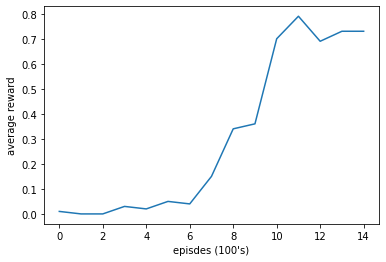

In [12]:
import matplotlib
import matplotlib.pyplot as plt

plt.clf()
def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

print(avg_rewards)
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episdes (100\'s)')
plt.show()
print()